# PRÁCTICA 1: Descenso por Gradiente
El objetivo principal de esta práctica es, por un lado, implementar varios métodos de regresión lineal y, por otro, hacer un primer acercamiento al tratamiento de datos.

Para poder realizarla, pondremos en la plataforma de la asignatura varios conjuntos de datos disponibles para descargarlos y los apuntes de teoría para usarlos de referencia.

# Regresión lineal con una variable (atributo)
El primer problema que se plantea es la predicción de las ganancias de un restaurante en función a la población de la ciudad donde está instalado.

El gerente de un restaurante francés está considerando diferentes ciudades para abrir un nuevo establecimiento y nos ha solicitado que le ayudemos a tomar la decisión para su localización. Para ello contamos con datos de varias ciudades y beneficios de los restaurantes de las mismas, en el fichero regresion_1.csv, donde la primera columna es la población de la ciudad y la segunda columna son los beneficios de los restaurantes en esa ciudad.

## 1.- Pintando los datos
Es muy recomendable que la primera tarea que debemos de realizar cuando atacamos un conjunto de datos nuevos es su representación gráfica y así hacernos una idea, si es posible, de qué método sería el más adecuado para iniciar el análisis.

Para este conjunto de datos es bastante simple realizar un gráfico 2-D donde representemos los beneficios en función de la población.

In [336]:
import random

import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from sklearn import linear_model

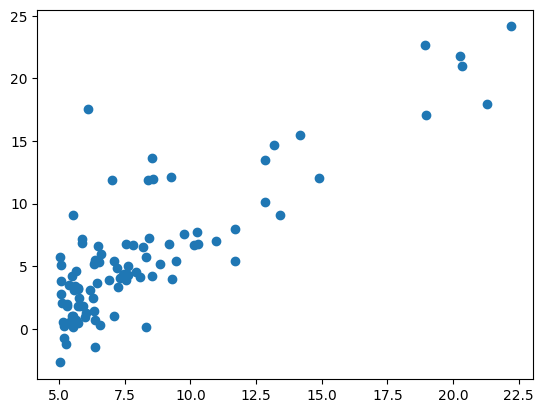

In [337]:
file_path = "./regresion_1.csv"
data_frame = pd.read_csv(file_path, sep=',', header=None, decimal='.')

plot.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1])

#### Ejercicio 1: Representar gráficamente los datos del fichero
Como primera estrategia, vamos a aplicar regresión lineal a esos datos

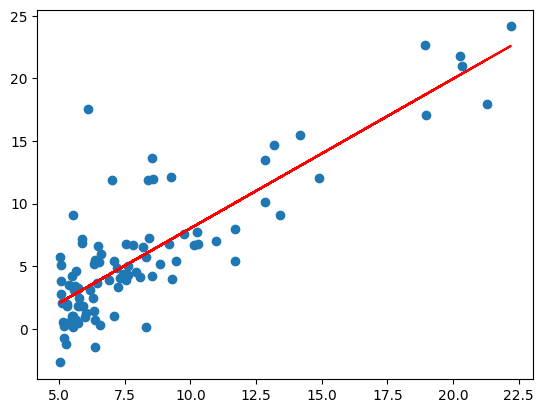

In [338]:
regression_model = linear_model.LinearRegression()

population = data_frame.iloc[:, 0].values
benefits = data_frame.iloc[:, 1].values

population = population.reshape(-1, 1)
benefits = benefits.reshape(-1, 1)

regression_model.fit(population, benefits)
benefits_predict = regression_model.predict(population)

plot.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1])
plot.plot(population, benefits_predict, color='red')
plot.show()

## 2- Aplicación externa
El objetivo principal es analizar los datos y para ello debemos de realizarlo de la forma más adecuada posible, usando todas las herramientas a nuestro alcance, tanto existentes como programarlas específicamente para nosotros.

Como primera aproximación podríamos usar una herramienta externa, o alguna librería existente, para hallar los datos que necesitamos o, al menos, una primera aproximación. En nuestro caso, el problema de regresión lineal es bastante simple y viene implementado en la mayoría de herramientas de tratamiento de datos, por lo que no será difícil extraer los valores de los coeficientes de ajuste.

#### Ejercicio 2:
Averigüar, mediante aplicación externa o librería, los valores de los coeficientes de ajuste. 

In [339]:
print(
    "b = ", regression_model.intercept_,
    "\na = ", regression_model.coef_,
    "\nRˆ2 = ", regression_model.score(population, benefits)
)

b =  [-3.89578088] 
a =  [[1.19303364]] 
Rˆ2 =  0.7020315537841397


## 3.- Ecuaciones normales
Comenzando con nuestro desarrollo, lo primero, más rápido y fiable, será aplicar la definición analítica obtenida en teoría.

![](./RegresionLineal.png)


#### Ejercicio 3:
Haciendo uso de alguna librería de matrices, calcular el valor de los coeficientes de ajuste y compararlos con los anteriores

In [340]:
m = population.shape[0]
population_mod = np.array([np.ones(len(population)), population.flatten()]).T

theta_values = np.linalg.inv(population_mod.T.dot(population_mod)).dot(population_mod.T).dot(benefits)

print(
    "b = ", theta_values[0],
    "\na = ", theta_values[1],
)

b =  [-3.89578088] 
a =  [1.19303364]


## 4.- Descenso por gradiente
En algunos casos se puede hacer necesaria la utilización de métodos alternativos. Una buena opción suele ser algún tipo de algoritmo por aproximaciones sucesivas y, para ello, vamos a implementar el algoritmo de descenso por gradiente y tratar de hallar los valores adecuados de θ de nuestros datos. Para verificar que nuestro algoritmo est ́a realizando los cálculos de forma adecuada, iremos calculando y almacenando los valores que toma J(θ) en cada una de las iteraciones.

En nuestro caso, el criterio de convergencia va a ser un nu ́mero fijo de iteraciones, que deber ́eis de ajustar en función del comportamiento del algoritmo.

El parámetro α de la actualización (velocidad de descenso) lo deberíamos de dividir por m (nu ́mero de ejemplos del dataset) para trabajar sobre error relativo, ya que la cantidad del error absoluto puede generar algún tipo de overflow. Esto no tiene un significado teo ́rico especial, pero ayuda a la convergencia más rápida.

Los valores iniciales de θ es un vector con todos sus componentes a “random”.

#### Ejercicio 4:
Escribir el algoritmo

In [341]:
def total_squared_error(x, y, a, b):
    m = len(x)
    error = 0.0
    for i in range(m):
        hypothesis = a * x[i] + b
        error += (hypothesis - y[i]) ** 2

    return error / 2

In [342]:
def gradient_descent(x, y, a, b, alpha, epochs):
    m = len(x)
    vector_error = []
    alpha = alpha / m

    for epoch in range(epochs):
        gradient_a = 0
        gradient_b = 0
        for i in range(m):
            hypothesis = a * x[i] + b
            gradient_a -= (hypothesis - y[i]) * x[i]
            gradient_b -= hypothesis - y[i]
        a += gradient_a * alpha
        b += gradient_b * alpha
        vector_error.append([a, b, total_squared_error(x, y, a, b)])

    return a, b, vector_error

#### Ejercicio 5:
Escribir los coeficientes de ajuste

In [343]:
a = 0
b = 0

alpha = .01
epochs = 1000

gradient_model = gradient_descent(population, benefits, a, b, alpha, epochs)

print(
    "b = ", gradient_model[1],
    "\na = ", gradient_model[0],
    "\nSquared Error = ", gradient_model[2][-1][2]
)

b =  [-3.24140214] 
a =  [1.1272942] 
Squared Error =  [438.0476838]


Debe probarse con 3-5 valores del factor de aprendizaje y mostrar la evolución del error durante la búsqueda para cada valor de alpha.

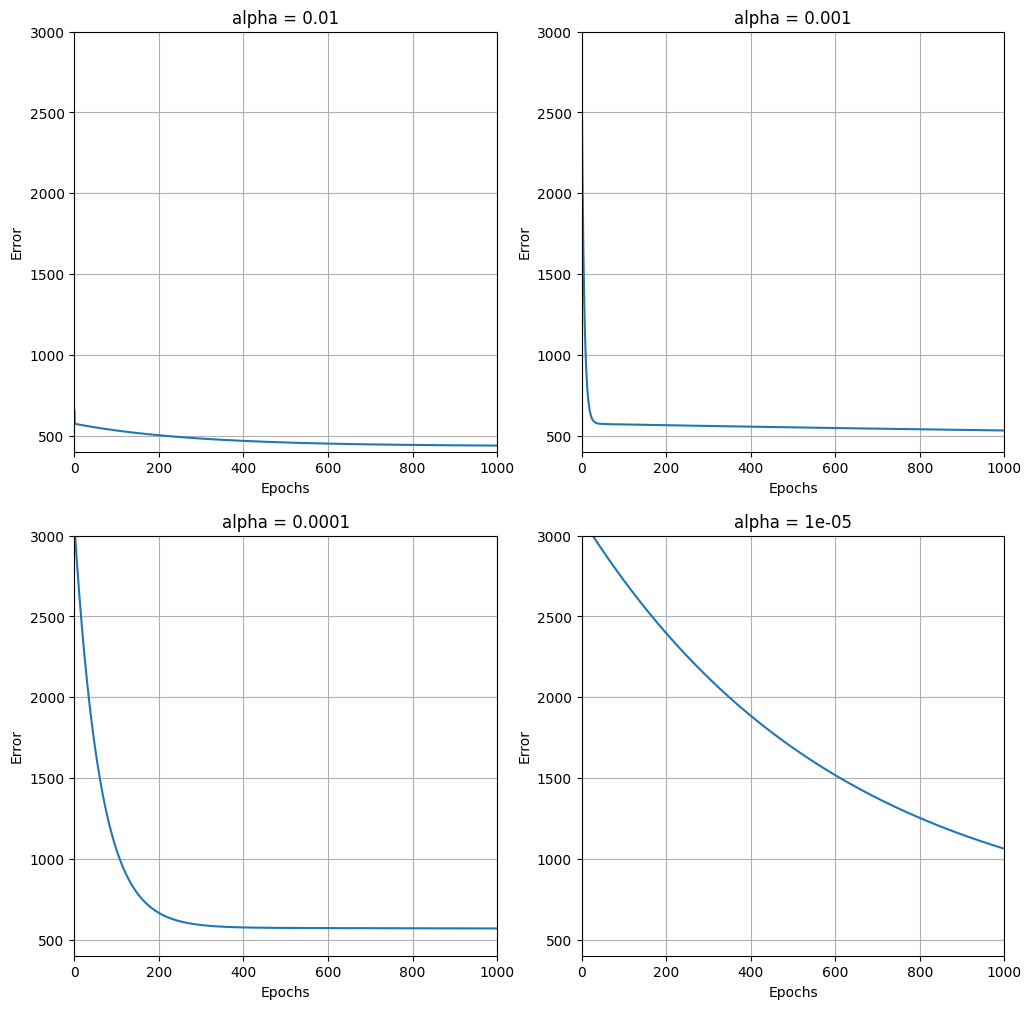

In [344]:
a = 0
b = 0
alpha = [.01, .001, .0001, .00001]
epochs = 1000
gradient_model = []

for i in range(len(alpha)):
    gradient_model.append(gradient_descent(population, benefits, a, b, alpha[i], epochs))

plot.figure(figsize=(12, 12))

for i in range(len(alpha)):
    plot.subplot(221 + i)
    plot.plot(range(epochs), [j[2][0] for j in gradient_model[i][2]])
    plot.title("alpha = " + str(alpha[i]))
    plot.xlabel('Epochs')
    plot.ylabel('Error')
    plot.axis([0, epochs, 400, 3000])
    plot.grid(True)

## 5.- Descenso por gradiente estocástico
El número de operaciones realizadas en el algoritmo anterior es bastante elevada, por lo que se hace necesaria algún tipo de aproximación. Esto da lugar al algoritmo de Descenso por gradiente estocástico.

#### Ejercicio 6:
Reescribir el algoritmo anterior, modificandolo para que admita "batch" de cualquier tamaño

In [345]:
def get_batch(x, y, batch_size):
    indexes = random.sample(range(len(x)), batch_size)
    x_batch = []
    y_batch = []

    for i in range(batch_size):
        x_batch.append(x[indexes[i]])
        y_batch.append(y[indexes[i]])

    x_batch = pd.DataFrame(x_batch)
    y_batch = pd.DataFrame(y_batch)

    x_batch = x_batch.iloc[:].values
    y_batch = y_batch.iloc[:].values

    return x_batch, y_batch

In [346]:
def stochastic_gradient_descent(x, y, a, b, alpha, epochs, batch_size):
    m = len(x)
    vector_error = []
    alpha = alpha / m

    for epoch in range(epochs):
        gradient_a = 0
        gradient_b = 0
        x_batch, y_batch = get_batch(x, y, batch_size)
        for i in range(batch_size):
            hypothesis = a * x_batch[i] + b
            gradient_a -= (hypothesis - y_batch[i]) * x_batch[i]
            gradient_b -= hypothesis - y_batch[i]
        a += gradient_a * alpha
        b += gradient_b * alpha
        vector_error.append([a, b, total_squared_error(x, y, a, b)])

    return a, b, vector_error

#### Ejercicio 7:
Escribir los nuevos coeficientes de ajuste.

In [347]:
a = 0
b = 0
alpha = .01
epochs = 1000
batch_size = 10

stochastic_gradient_model = stochastic_gradient_descent(population, benefits, a, b, alpha, epochs, batch_size)

print(
    "b = ", stochastic_gradient_model[1],
    "\na = ", stochastic_gradient_model[0],
    "\nSquared Error = ", stochastic_gradient_model[2][-1][2]
)

b =  [-0.60583968] 
a =  [0.87891272] 
Squared Error =  [530.81430705]


## 6.- Predicción
Como resultado final íbamos buscando la predicción de beneficios en función de la población. Para ello

#### Ejercicio 8:
Construiremos una función genérica que reciba como parámetros los coeficientes de ajuste y los valores de la entrada, generando el valor precedido.

In [348]:
def predict(x, a, b):
    return a * x + b

Para hacernos una idea gráfica de los resultados

#### Ejercicio 9:
Representar los datos junto con la gráfica de la hipótesis, para cada uno de los casos: Ecuaciones normales, gradiente y gradiente estocástico.

Gradient Descent: 
	b =  [-3.24140214] 
	a =  [1.1272942] 
	Squared Error =  [438.0476838]

 Stochastic Gradient Descent: 
	b =  [-0.5814509] 
	a =  [0.83242705] 
	Squared Error =  [534.44943006]


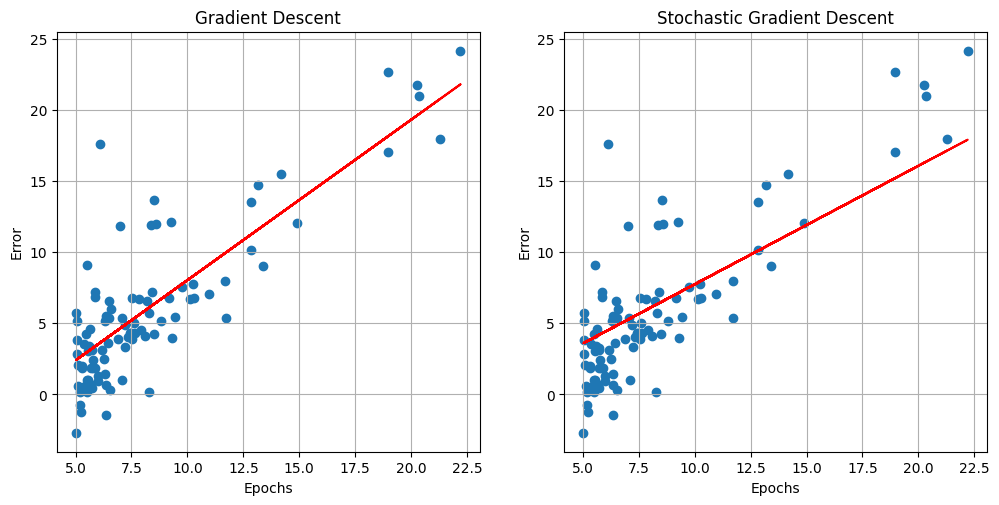

In [349]:
a = 0
b = 0
alpha = .01
epochs = 1000
batch_size = 10
models = []

models.append(gradient_descent(population, benefits, a, b, alpha, epochs))
models.append(stochastic_gradient_descent(population, benefits, a, b, alpha, epochs, batch_size))

plot.figure(figsize=(12, 12))

plot.subplot(221)
plot.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1])
plot.plot(population, predict(population, models[0][0], models[0][1]), color='red')
plot.title("Gradient Descent")
plot.xlabel('Epochs')
plot.ylabel('Error')
plot.grid(True)

plot.subplot(222)
plot.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1])
plot.plot(population, predict(population, models[1][0], models[1][1]), color='red')
plot.title("Stochastic Gradient Descent")
plot.xlabel('Epochs')
plot.ylabel('Error')
plot.grid(True)

print(
    "Gradient Descent:",
    "\n\tb = ", models[0][1],
    "\n\ta = ", models[0][0],
    "\n\tSquared Error = ", (models[0][2])[-1][2]
)

print(
    "\n",
    "Stochastic Gradient Descent:",
    "\n\tb = ", models[1][1],
    "\n\ta = ", models[1][0],
    "\n\tSquared Error = ", (models[1][2])[-1][2]
)

También es importante la idea numérica:

In [350]:
print(
    "Normal equations: ", predict(9.5,theta_values[1],theta_values[0]),
    "\nGradient Descent: ", predict(9.5,models[0][0],models[0][1]),
    "\nStochastic Gradient Descent: ", predict(9.5,models[1][0],models[1][1]),
)

Normal equations:  [7.43803874] 
Gradient Descent:  [7.46789278] 
Stochastic Gradient Descent:  [7.32660607]


#### Ejercicio 10:
¿Cuánto beneficio obtendría un restaurante en una población estimada de 9.5 (miles) de habitantes?

---